In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('House Price India.csv')

In [3]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
house = data.drop(['id', 'Date', 'waterfront present', 'number of views', 'condition of the house', 'grade of the house', 'lot area', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'number of floors'], axis = 1)

In [6]:
house

,number of bedrooms,number of bathrooms,living area,Area of the house(excluding basement),Price
0,4,2.50,2920,1910,1400000
1,5,2.75,2910,2910,1200000
2,4,2.50,3310,3310,838000
3,3,2.00,2710,1880,805000
4,3,2.50,2600,1700,790000
...,...,...,...,...,...
14614,2,1.50,1556,1556,221700
14615,3,2.00,1680,1680,219200
14616,2,1.00,1070,1070,209000
14617,4,1.00,1030,1030,205000


In [7]:
house = house.rename(columns={'Area of the house(excluding basement)': 'Area of the house'})

array([[<Axes: title={'center': 'number of bedrooms'}>,
        <Axes: title={'center': 'number of bathrooms'}>],
       [<Axes: title={'center': 'living area'}>,
        <Axes: title={'center': 'Area of the house'}>],
       [<Axes: title={'center': 'Price'}>, <Axes: >]], dtype=object)

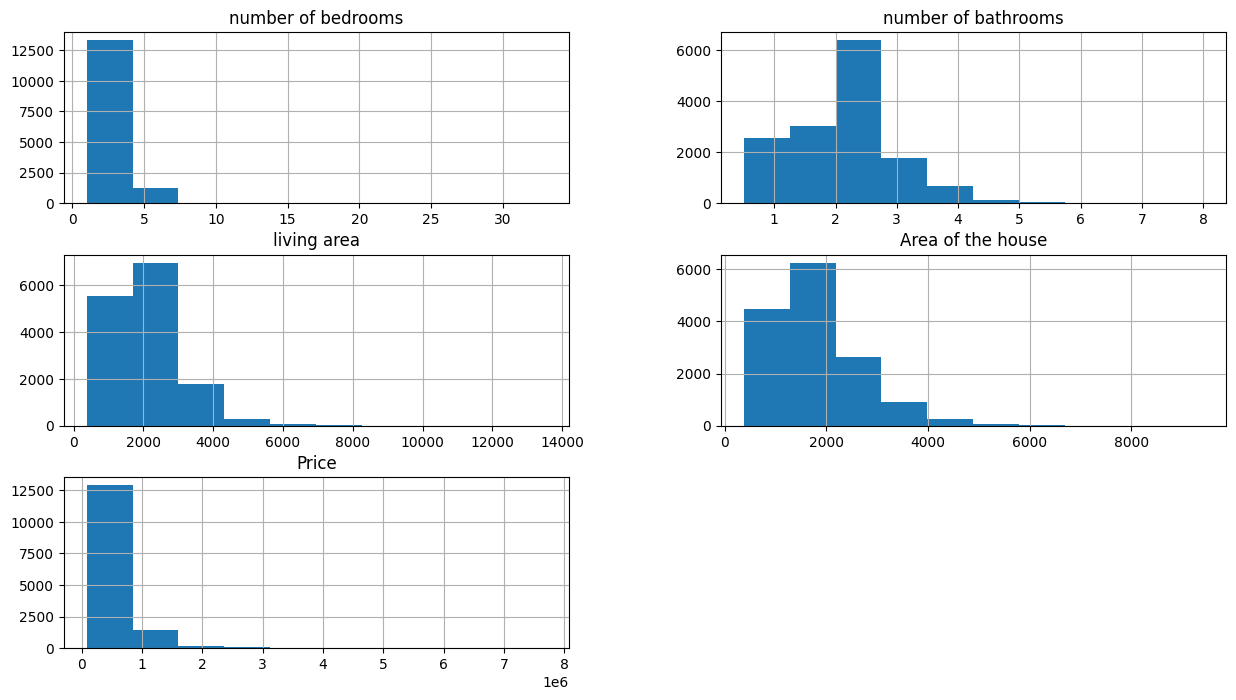

In [8]:
house.hist(figsize=(15, 8))

<Axes: >

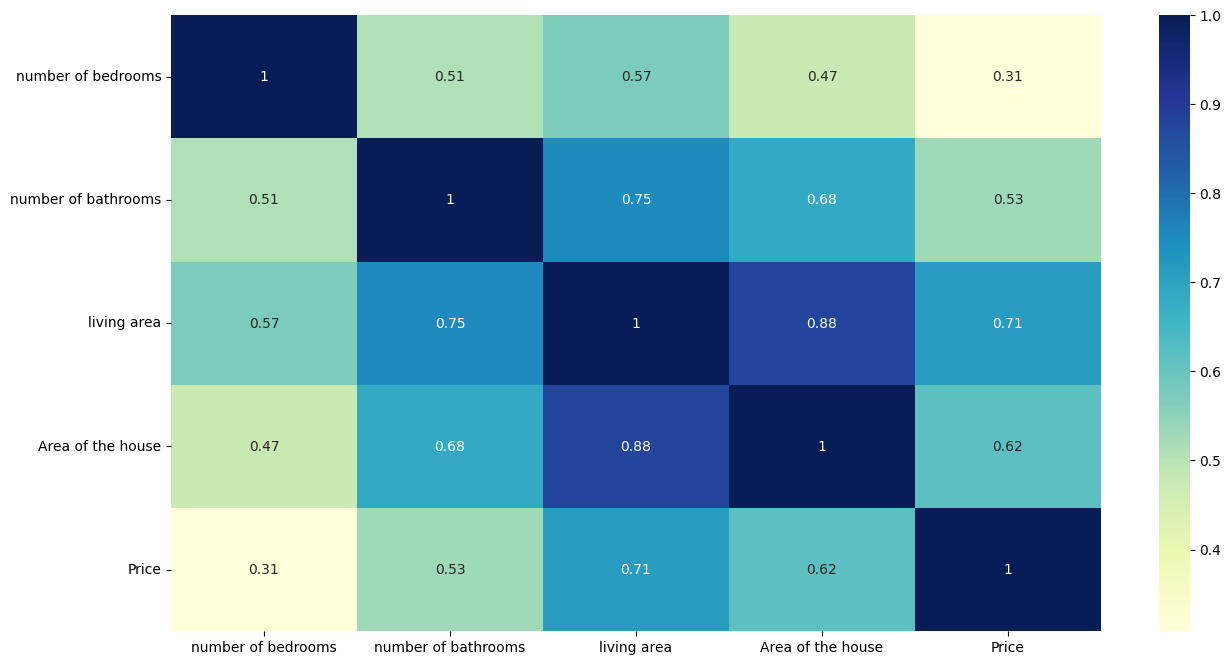

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(house.corr(),annot=True, cmap="YlGnBu")

In [10]:
X = house.drop(['Price'], axis = 1)
y = house[['Price']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.model_selection import GridSearchCV

In [23]:
from sklearn.tree import DecisionTreeRegressor
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [24]:
tree_model = DecisionTreeRegressor()

In [25]:
grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid)

In [26]:
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
grid_tree.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=10, splitter='random')

In [30]:
tree_pred = grid_tree.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, tree_pred)

np.float64(66504710882.0081)

In [38]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [39]:
lr_pred = lr.predict(X_test)

In [40]:
mean_squared_error(y_test, lr_pred)

np.float64(67675722944.44609)

In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, tree_pred)

np.float64(166409.7759793663)

In [42]:
mean_absolute_error(y_test, lr_pred)

np.float64(167857.70423845874)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [48]:
param_gridrfr ={
    'max_depth':[5, 10, 15],
    'n_estimators':[2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [49]:
gridrfr = GridSearchCV(rfr, param_gridrfr)

In [51]:
gridrfr.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [55]:
gridrfr.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=8)

In [57]:
rfrpred = gridrfr.predict(X_test)

In [58]:
mean_absolute_error(y_test, rfrpred)

np.float64(163047.31451485516)

In [61]:
import joblib

In [62]:
joblib.dump(gridrfr, 'model.pkl')

['model.pkl']

In [63]:
X.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'Area of the house'],
      dtype='object')

In [68]:
house['living area'].describe()


count    14619.000000
mean      2098.156851
std        928.218740
min        370.000000
25%       1440.000000
50%       1930.000000
75%       2570.000000
max      13540.000000
Name: living area, dtype: float64

In [67]:
house['Area of the house'].describe()

count    14619.000000
mean      1801.676654
std        833.737588
min        370.000000
25%       1200.000000
50%       1580.000000
75%       2240.000000
max       9410.000000
Name: Area of the house, dtype: float64